# RK4 Model

### Trajectory of golf ball 

In this notebook, we compare the trajectory of a golf ball computed with a model that includes drag force and Magnus effect to the the trajectory given by a HD Golf simulator. Our model uses the same initial conditions as the HD Golf simulator.

## Resources

Note that it's not unusual to see the variable $y$ used for $v_x$. This can be confusing.

- [Coupled masses](http://scipy-cookbook.readthedocs.io/items/CoupledSpringMassSystem.html). This is a clear example.
- [Projectile motion with drag](http://ipython-books.github.io/123-simulating-an-ordinary-differential-equation-with-scipy/). This uses some interesting numpy tricks like the `r_()` function, so it's harder to figure out.

In [1]:
import numpy as np #math and arrays
import matplotlib.pyplot as plt #used for graphing
import scipy.integrate as spi 
import pandas as pd

## Define Constants for the Model

In [2]:
#constants for the model
rho = 1.225 #air density, kg/m^3
Cd = 0.41123417 #drag coefficient
Cm = 0.59101698 #magnus coefficient
R = 0.04267/2 #radius of ball, m
A = np.pi*R**2 #area
g = 9.8 #Earth's grav field strength
m = 0.0456 #mass of the ball, kg
spinrate = 0 #this depends on the shot and will be changed within the main loop

#pass parameters to the ode function
params=[m,g,rho,Cd,Cm,R,A,spinrate]

In [3]:
# Read data file and define dataframe object (df for dataframe)
df = pd.read_table('TESTDATA.txt')
df.head(13)

,Shot Distance (m),Carry (m),Bounce & Roll (m),Ball Speed (m/s),Club Speed (m/s),Launch Angle (deg),Club Path,Club Face Angle (deg),Smash Factor,Horizontal Angle (deg),Apex (m),Impact Position,Spin (rpm),X Peak Point (m),Y Peak Point (m),X End Point (m),Y End Point (m)
0,117.9,116.7,1.1,43.0,38.3,21.8,-2.3,0.0,1.12,-2.3,20.9,TOE,9746,71,20.9,117,0
1,111.6,110.9,0.7,41.4,35.7,25.9,-2.2,0.0,1.16,-2.2,23.1,TOE,9566,67,23.1,111,0
2,112.4,122.1,0.3,45.3,38.5,25.4,-2.8,0.0,1.18,-2.8,27.5,CENTER,9898,75,27.5,122,0
3,117.7,115.4,2.3,41.5,37.1,26.2,-0.6,0.0,1.12,-0.6,23.4,TOE,7865,69,23.4,117,0
4,117.9,115.6,2.4,42.0,35.9,22.0,-2.2,0.1,1.17,-2.3,19.7,HEEL,8613,70,19.7,118,0
5,128.6,127.0,1.7,45.1,37.5,26.3,-0.4,0.2,1.20,-0.2,28.1,CENTER,7895,77,28.1,128,0
6,124.4,123.1,1.2,44.8,38.7,28.1,-2.3,0.2,1.16,-2.5,29.6,CENTER,8452,75,29.6,124,0
7,118.8,118.1,0.6,43.6,36.1,24.7,-3.2,0.2,1.21,-3.4,24.7,CENTER,9651,72,24.7,118,0
8,104.4,102.1,2.3,37.6,34.9,28.2,-2.0,0.2,1.08,-1.8,20.7,TOE,7616,60,20.7,104,0
9,117.7,116.3,1.5,42.3,35.7,26.7,1.1,0.3,1.18,0.9+,25.0,CENTER,8486,70,25.0,117,0


In [4]:
rows=df['Carry (m)'].size
rows

12

In [5]:
def f(r, t, p):    
    """
    Defines the differential equations for the system.

    Arguments:
        r :  array of the state variables:
                  r = [x,vx,y,vy]
        t :  array of time values
        p :  array of the parameters:
                  p = [m,g,rho,Cd,Cm,R,A,spinrate]
    """
    m=p[0]
    g=p[1]
    rho=p[2]
    Cd=p[3]
    Cm=p[4]
    R=p[5]
    A=p[6]
    spinrate=p[7]
    
    x=r[0]
    y=r[2]
    vx=r[1]
    vy=r[3]

    # compute the derivative of velocity 
    speed=np.sqrt(vx**2+vy**2)
    vxdot = -1/2*rho*Cd*A/m*speed*vx - 1/2*Cm*rho*np.pi*R**3*spinrate*vy/m
    vydot = -g + -1/2*rho*Cd*A/m*speed*vy + 1/2*Cm*rho*np.pi*R**3*spinrate*vx/m
    
    #return [vx,vy,vxdot,vydot]
    return np.array([vx,vxdot,vy,vydot])

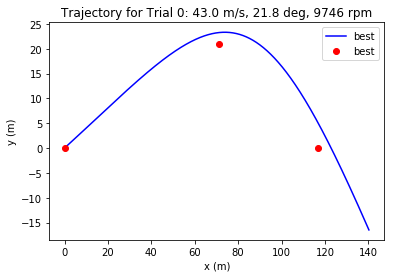

model apex (x,y) = ( 73.757751246 ,  23.3336421922 )m
model end (x,y) = ( 122.796576949 ,  -0.00201437769996 )m


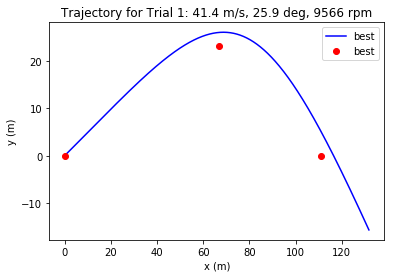

model apex (x,y) = ( 68.7465289601 ,  26.0001548855 )m
model end (x,y) = ( 116.47773443 ,  0.0163141380346 )m


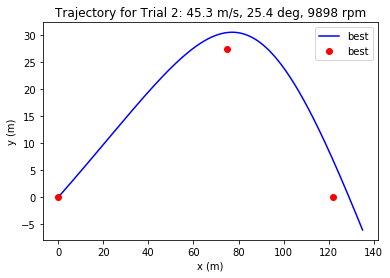

model apex (x,y) = ( 77.1687230983 ,  30.5944546532 )m
model end (x,y) = ( 129.081524617 ,  -0.0176454395494 )m


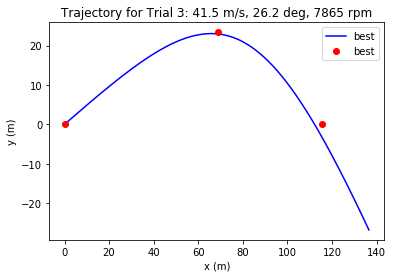

model apex (x,y) = ( 65.8390062992 ,  23.0546216708 )m
model end (x,y) = ( 112.133021877 ,  0.0439291871074 )m


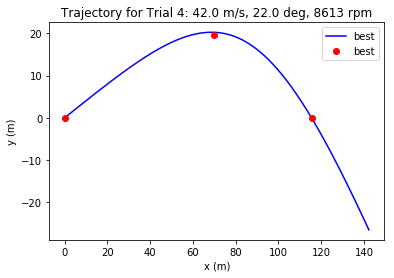

model apex (x,y) = ( 68.7084121694 ,  20.2399502016 )m
model end (x,y) = ( 115.51371893 ,  -0.0198461641276 )m


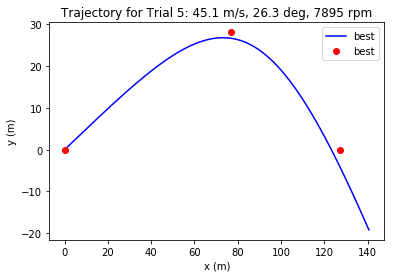

model apex (x,y) = ( 73.1906043741 ,  26.7924595128 )m
model end (x,y) = ( 123.262787909 ,  -0.0358920359473 )m


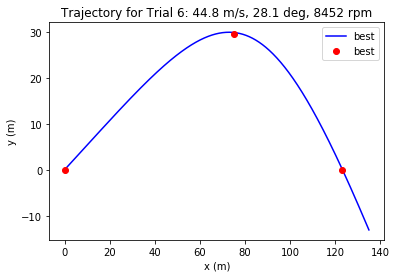

model apex (x,y) = ( 72.9025935443 ,  29.9091276112 )m
model end (x,y) = ( 123.210057131 ,  0.0435070581061 )m


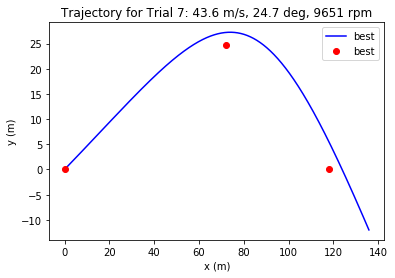

model apex (x,y) = ( 73.920061634 ,  27.2399881886 )m
model end (x,y) = ( 123.891671303 ,  -0.0103529025767 )m


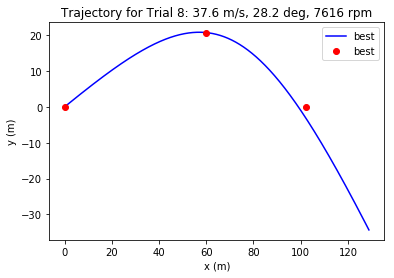

model apex (x,y) = ( 56.9850776704 ,  20.8277636141 )m
model end (x,y) = ( 99.0477900249 ,  -0.0398791090122 )m


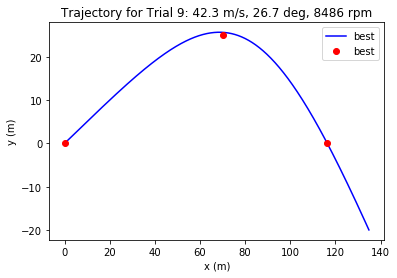

model apex (x,y) = ( 68.6014134826 ,  25.6464094323 )m
model end (x,y) = ( 116.417354931 ,  -0.0135133977692 )m


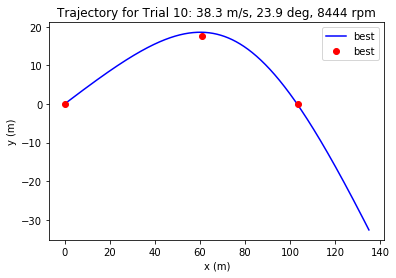

model apex (x,y) = ( 60.1513180135 ,  18.5982903713 )m
model end (x,y) = ( 103.195502851 ,  -0.0117238993055 )m


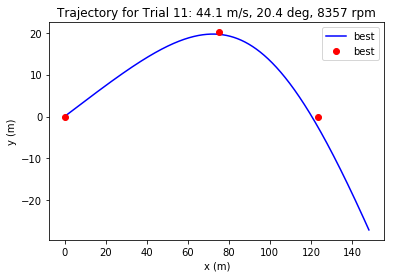

model apex (x,y) = ( 72.3038893407 ,  19.6656237975 )m
model end (x,y) = ( 120.404884227 ,  -0.0115661204496 )m


In [6]:
#loop through all rows

for row in range(0,rows):
    df_row=df.iloc[row]
    
    #data for HD Golf trajectory
    x_carry = df_row['Carry (m)']
    x_apex = df_row['X Peak Point (m) ']
    y_apex = df_row['Y Peak Point (m)']

    x_hdgolf = [0, x_apex, x_carry]
    y_hdgolf = [0, y_apex, 0]    
    
    #initial conditions for the ball
    launch_angle = df_row['Launch Angle (deg)'] * np.pi/180 #radians
    launch_speed = df_row['Ball Speed (m/s)'] #m/s
    rpm = df_row['Spin (rpm)'] #rev per minute 
    spinrate = rpm /60 *2* np.pi
    params[7]=spinrate #this variable is kept in the parameters list
    
    # trajectory data array: [x,vx,y,vy]
    r0 = np.zeros(4) #four columns of data

    #Define initial positions and velocity
    r0[0] = 0 # x(0)
    r0[1] = launch_speed*np.cos(launch_angle) # vx(0)
    r0[2] = 0 # y(0)
    r0[3] = launch_speed*np.sin(launch_angle) # vy(0)

    #Solve the DE using RK4
    t_array = np.linspace(0., 7, 1000)
    r = spi.odeint(f, r0, t_array,args=(params,))
    
    #plot graph of x vs. y position 
    plt.title("Trajectory for Trial %i: %.1f m/s, %.1f deg, %.0f rpm" % (row, launch_speed, launch_angle/np.pi*180, rpm))
    plt.xlabel('x (m)')
    plt.ylabel('y (m)')

    #for the trajectory, plot the first and third columns: r = [x,vx,y,vy]
    plt.plot(r[:,0],r[:,2],'b-', label='best')
    #plot points for HD Golf results
    plt.plot(x_hdgolf,y_hdgolf,'ro', label='best')
    plt.legend(loc='upper right')
    plt.show()
    
    y_apex=np.max(r[:,2]) #y value of peak
    apex_index, = np.where(r[:,2] == y_apex)
    x_apex = r[:,0][int(apex_index)]
    print("model apex (x,y) = (", x_apex, ", ", y_apex, ")m")
    
    y_no_initial=np.delete(r[:,2], 0) #array without the initial values
    abs_y=np.abs(y_no_initial) # |y| so negative values will be positive
    index_ground=np.argmin(abs_y) #index of array when |y| is a min (at ground)
    carry=r[:,0][index_ground+1] #x value when projectile hits the ground
    x_end=carry
    y_end=r[:,2][index_ground+1] #y value when projectile hits the ground
    print("model end (x,y) = (", x_end, ", ", y_end, ")m")



    #Difference of peak point between HD and model 
#    dPeak_sq = (x_apex - )**2 + (y_apex - )**2
    
    #Difference of end point between HD and model 
#    dEnd_sq = (x_carry - )**2 + ()

